# Chances of Heart Attack Analysis

A heart attack occurs when an artery supplying your heart with blood and oxygen becomes blocked. 
        Fatty deposits build up over time, forming plaques in your heart's arteries. If a plaque ruptures, a blood clot can form and block your arteries, causing a heart attack..

* * *
In this work, exploratory data analysis has been carried out for what are the reasons which can effect the heart attack

**FEATURES:**

1.  **AGE** - AGE OF THE PATIENT

2.  **SEX** - SEX OF THE PATIENT , (1:MALE , 0: FEMALE)

3.  **EXANG** - EXERCISE INCLUDE ANGIA (1=YES, 0=NO)

4.  **CA** - NUMBER OF MAJOR VESSELS (0-3)

5.  **CP** - CHEST PAIN TYPE (Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic

6.  **TRTBPS** - RESTING BLOOD PRESSURE IN (MM|HG)

7.  **CHOL** - CHOLESTROL IN (MG|DL) FETCHED VIA BMI SENSOR

8.  **FBS** - (FASTING BLOOD SUGAR > 120 MG/DL) (1=TRUE, 0=FALSE)

9.  **REST-ECG** -(RESTING ELECTROCARDIOGRAPHIC RESULTS) Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

10.  **THALACH** -MAXIMUM HEAERT RATE ACHIEVED

11.  **TARGET** -0=LESS CHANCE OF HEART ATTACK, 1= MORE CHANCE OF HEART ATTACK

**ANSWER TO THE FOLLOWING QUESTIONS ARE GIVEN:**

1.  Increasing in age have any effect towards heart attack.

2.  Does increase in cholestrol level in body have any effect towards the heart attack

3.  Increase in blood pressure have any relation with heart attack.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

<p id="part3"></p>

# <span style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #FF8C00">1 DATA DESCRIPTION AND DATA CLEANING</span>
<hr style="height: 0.5px; border: 0; background-color: #808080">

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">In this block, cleaning part will be carried out, data types, missing values, duplicates.</p>

<p id="part4"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">1.1 Import Data</p>

In [2]:
# Reading Data:
df=pd.read_csv("./heart.csv")
df.head()  #Loading the First Five Rows:

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Let's Look The Dimensions Of The Data:
print(f'The Data-Set Contain {df.shape[0]} Rows and {df.shape[1]} Columns')


The Data-Set Contain 303 Rows and 14 Columns


<p id="part5"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">1.2 Data Types</p>

In [4]:
#Check Data Types
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Data contains 13 Numerical columns and 1 Float Column.</p>

<p id="part6"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">1.3 Missing values</p>

<p style = "font-family: Inter, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)"> Let's calculate the percentage of blanks and filled values for all columns.</p>

In [5]:
# loop through the columns and check the missing values
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :.1%}')

age - 0.0%
sex - 0.0%
cp - 0.0%
trtbps - 0.0%
chol - 0.0%
fbs - 0.0%
restecg - 0.0%
thalachh - 0.0%
exng - 0.0%
oldpeak - 0.0%
slp - 0.0%
caa - 0.0%
thall - 0.0%
output - 0.0%


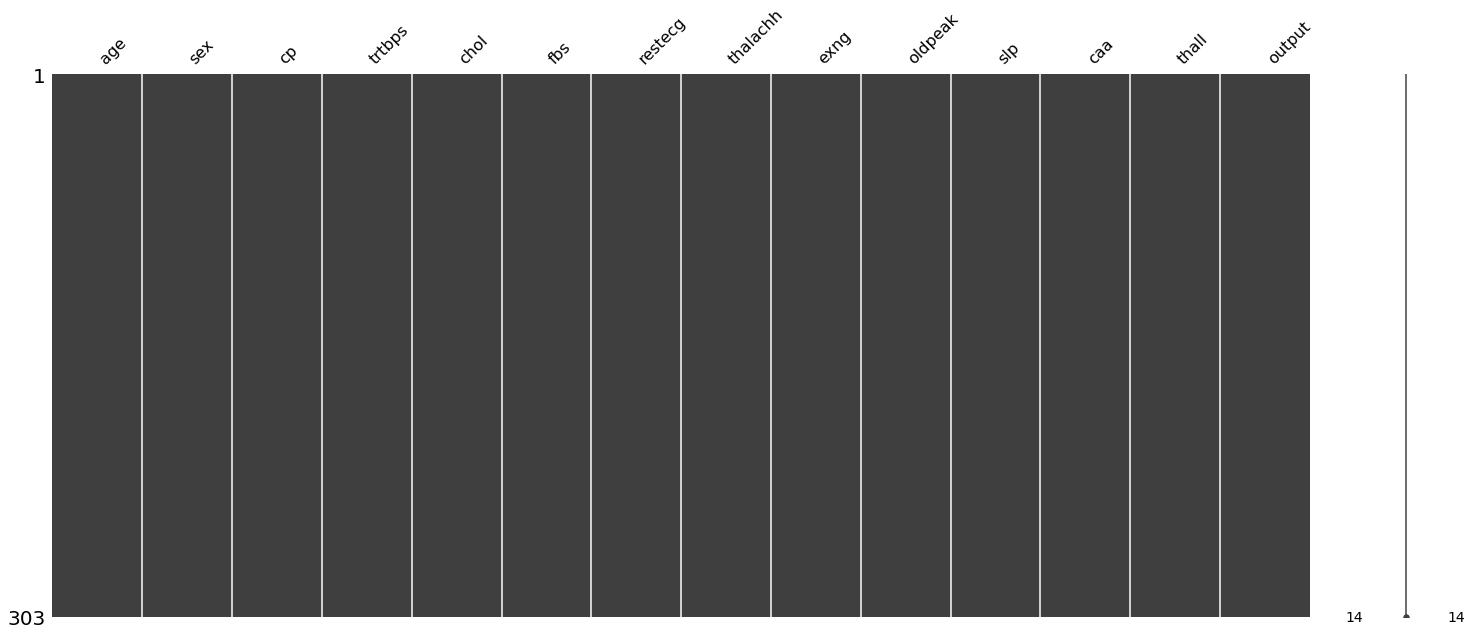

In [6]:
# Build a matrix of missing values
missingno.matrix(df, fontsize = 16)
plt.show()

<div style="background: #DCDCDC"><p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>CONCLUSION:</strong> The data has no missing values, so no further transformations are required.</p></div>

<p id="part7"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">1.4 Duplicates</p>

In [7]:
#Check The Duplicates In the Data-Set:
df.duplicated().sum()

1

<p style = "font-family: Inter, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">There is 1 Duplicate Value Present in the Data-set.</p>

In [8]:
# We will drop the Duplicate value:
df=df.drop_duplicates(keep="first")

<div style="background: #DCDCDC"><p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>CONCLUSION:</strong>Now our Data is Clean We can do Further Analysis.</p></div>

<p id="part8"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2. Analysis:</p>

<p id="part9"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.1 Uni-variate Analysis:</p>

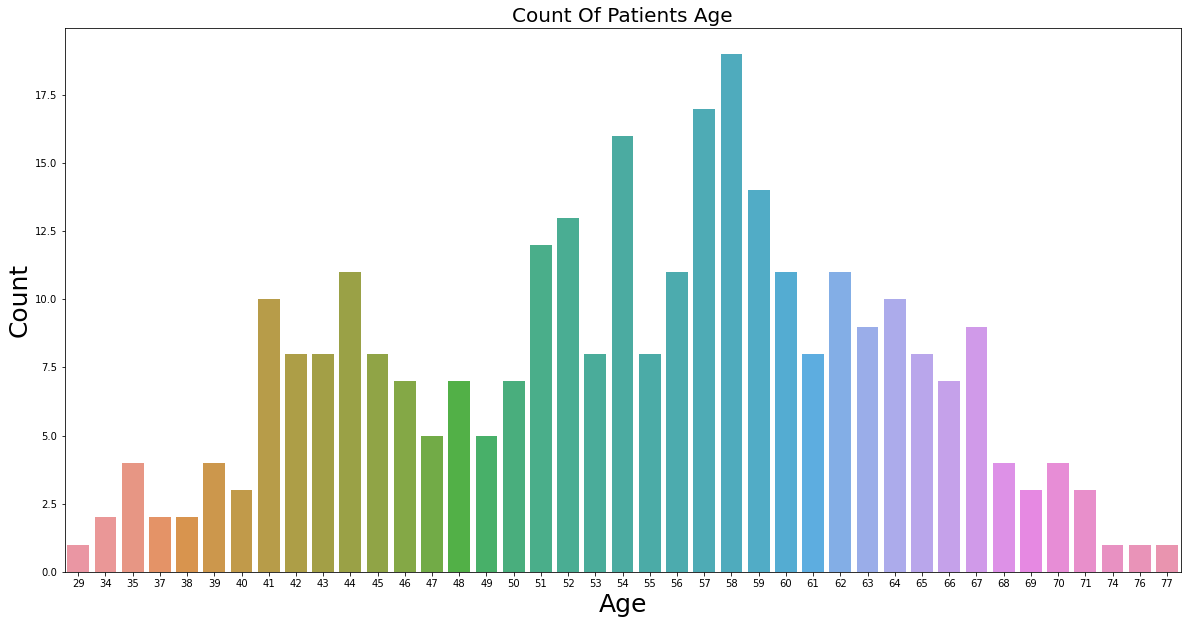

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"])
plt.title("Count Of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=25)
plt.ylabel("Count",fontsize=25)
plt.show()

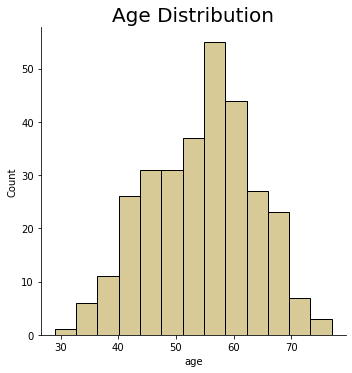

In [15]:
sns.set_color_codes()
ax = sns.displot(df["age"], color='y')
plt.title("Age Distribution",fontsize=20)
plt.show()

In [16]:
s=df["sex"].value_counts().reset_index()
px.pie(s,names="index",values="sex",title="% Of Male and Female Patients:")


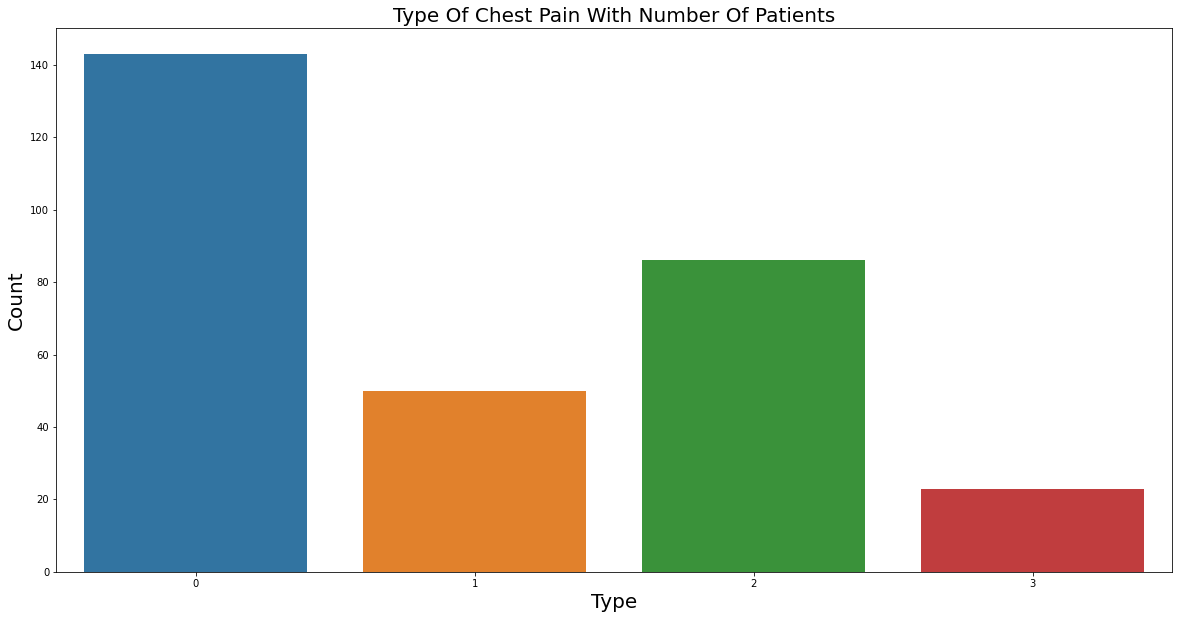

In [18]:
c=df["cp"].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x=c["index"],y=c["cp"])
plt.title("Type Of Chest Pain With Number Of Patients",fontsize=20)
plt.xlabel("Type",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()


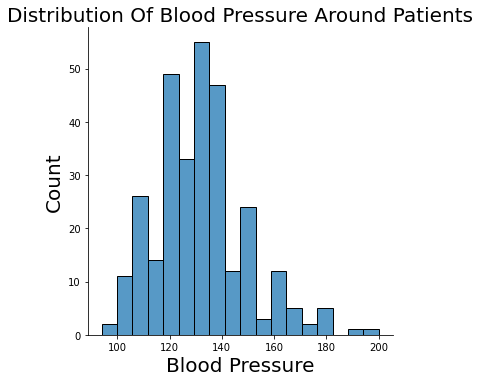

In [19]:
sns.displot(df["trtbps"])
plt.title("Distribution Of Blood Pressure Around Patients",fontsize=20)
plt.xlabel("Blood Pressure",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()


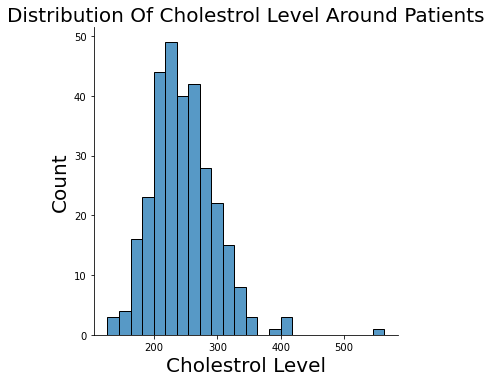

In [20]:
sns.displot(df["chol"])
plt.title("Distribution Of Cholestrol Level Around Patients",fontsize=20)
plt.xlabel("Cholestrol Level",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

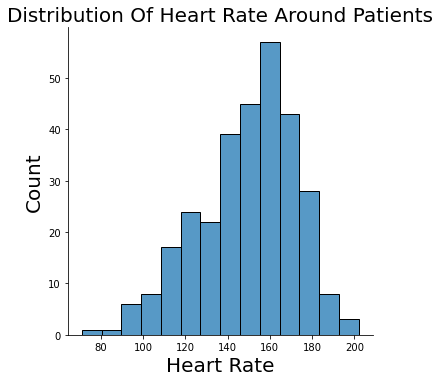

In [21]:
sns.displot(df["thalachh"])
plt.title("Distribution Of Heart Rate Around Patients",fontsize=20)
plt.xlabel("Heart Rate",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

**INSIGHT :** Uni-Variate Analysis Of The Data:

1.  Most of the patients have age (50-60).In which maximum number of Patients have age 56.

2.  Around 68.2% (207) are Male patients and 31.8% (96) are Female patients .

3.  Most of the patients have type Value 1 Chest Pain that is typical angina Value.

4.  Most of the patients Blood Pressure lies between (130-140).

5.  Most of the patients Chlostrol level lies between (200-250).

6.  Most of the patients Heart Rate lies between (155-165).

<p id="part10"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.2 Analysis:</p>

#### Age and Sex

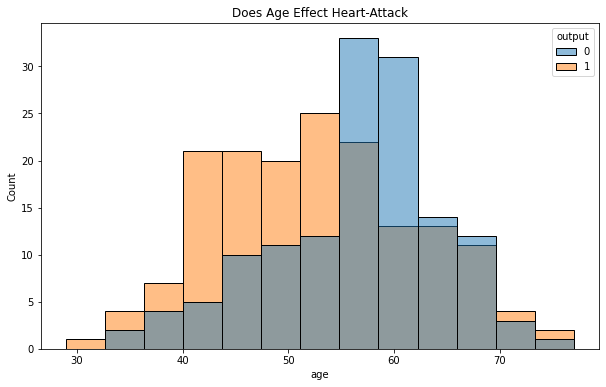

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'age', hue = 'output')
plt.title("Does Age Effect Heart-Attack")
plt.show()

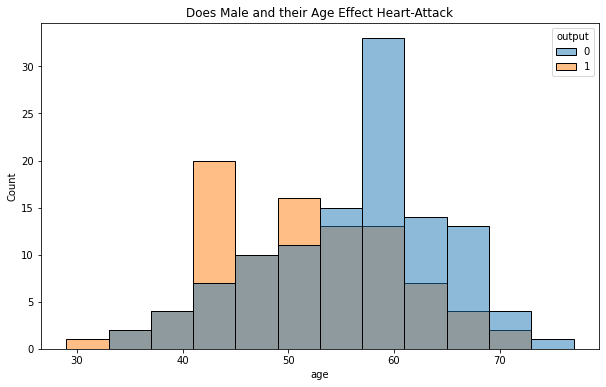

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(data = df[df['sex']==1], x = 'age', hue = 'output')
plt.title("Does Male and their Age Effect Heart-Attack")
plt.show()

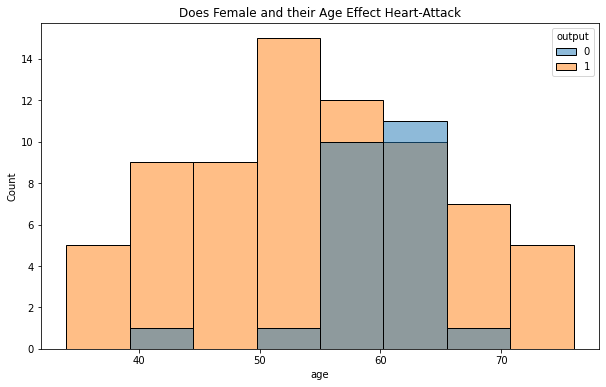

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(data = df[df['sex']==0], x = 'age', hue = 'output')
plt.title("Does Female and their Age Effect Heart-Attack")
plt.show()

In [69]:
v=pd.crosstab(df["age"],df["output"]).reset_index()
v.columns=["age","low_risk","high_risk"]
px.line(v,v["age"],v["high_risk"],title="The relationship between Age in the group of high chance to get Heart Attack")

In [75]:
v=pd.crosstab(df[(df['sex']==1)]["age"],df[(df['sex']==1)]["output"]).reset_index()
v.columns=["age","low_risk","high_risk"]
px.line(v,v["age"],v["high_risk"],title="Male group: The relationship between Age in the group of high chance to get Heart Attack")

In [77]:
v=pd.crosstab(df[(df['sex']==0)]["age"],df[(df['sex']==0)]["output"]).reset_index()
v.columns=["age","low_risk","high_risk"]
px.line(v,v["age"],v["high_risk"],title="Female group: The relationship between Age in the group of high chance to get Heart Attack")

In [80]:
v=pd.crosstab(df["age"],df["output"]).reset_index()
v.columns=["age","low_risk","high_risk"]
px.line(v,v["age"],v["low_risk"],title="The relationship between Age in the group of low chance to get Heart Attack")

In [81]:
v=pd.crosstab(df[(df['sex']==1)]["age"],df[(df['sex']==1)]["output"]).reset_index()
v.columns=["age","low_risk","high_risk"]
px.line(v,v["age"],v["low_risk"],title="Male group: The relationship between Age in the group of low chance to get Heart Attack")

In [83]:
v=pd.crosstab(df[(df['sex']==0)]["age"],df[(df['sex']==0)]["output"]).reset_index()
v.columns=["age","low_risk","high_risk"]
px.line(v,v["age"],v["low_risk"],title="Female group: The relationship between Age in the group of low chance to get Heart Attack")

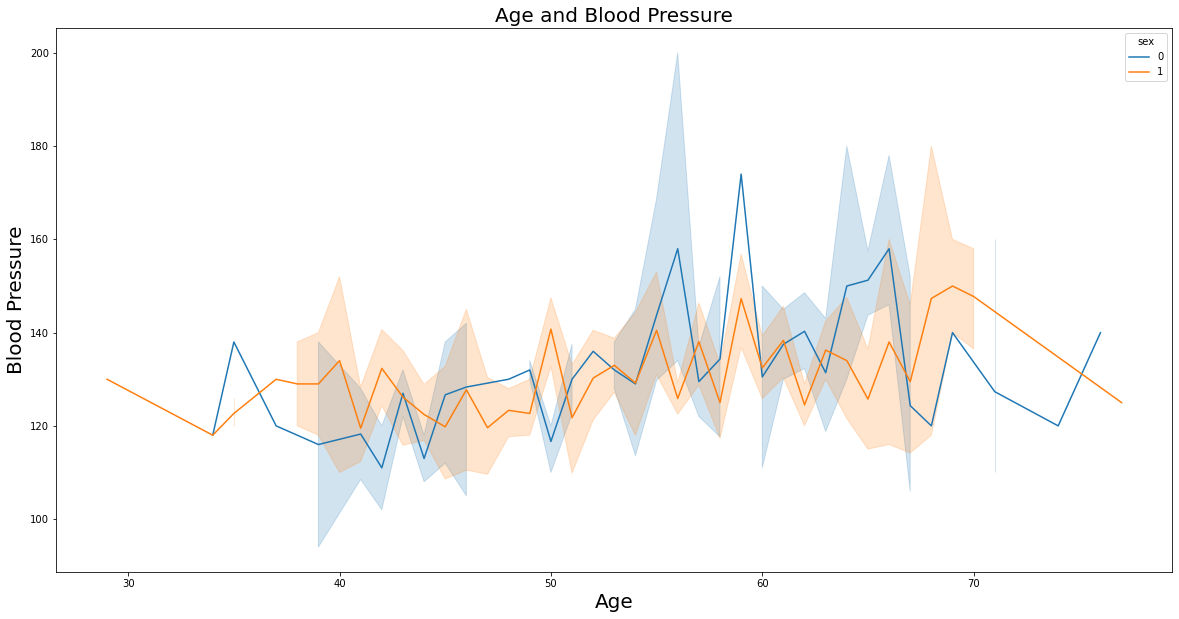

In [95]:
plt.figure(figsize=(20,10))
sns.lineplot(y="trtbps",x="age",data=df, hue="sex")
plt.title("Age and Blood Pressure",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Blood Pressure",fontsize=20)
plt.show()

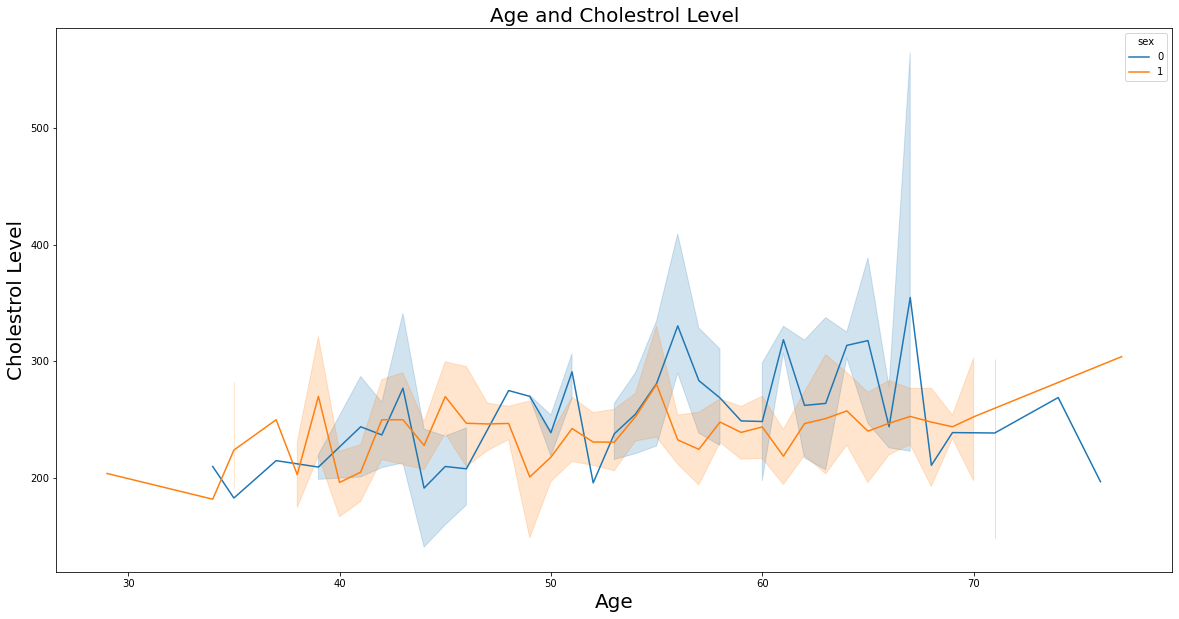

In [96]:
plt.figure(figsize=(20,10))
sns.lineplot(y="chol",x="age",data=df, hue="sex")
plt.title("Age and Cholestrol Level",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Cholestrol Level",fontsize=20)
plt.show()

There is high chance of increase in Cholestrol level in the body with increase in the age for both male and female


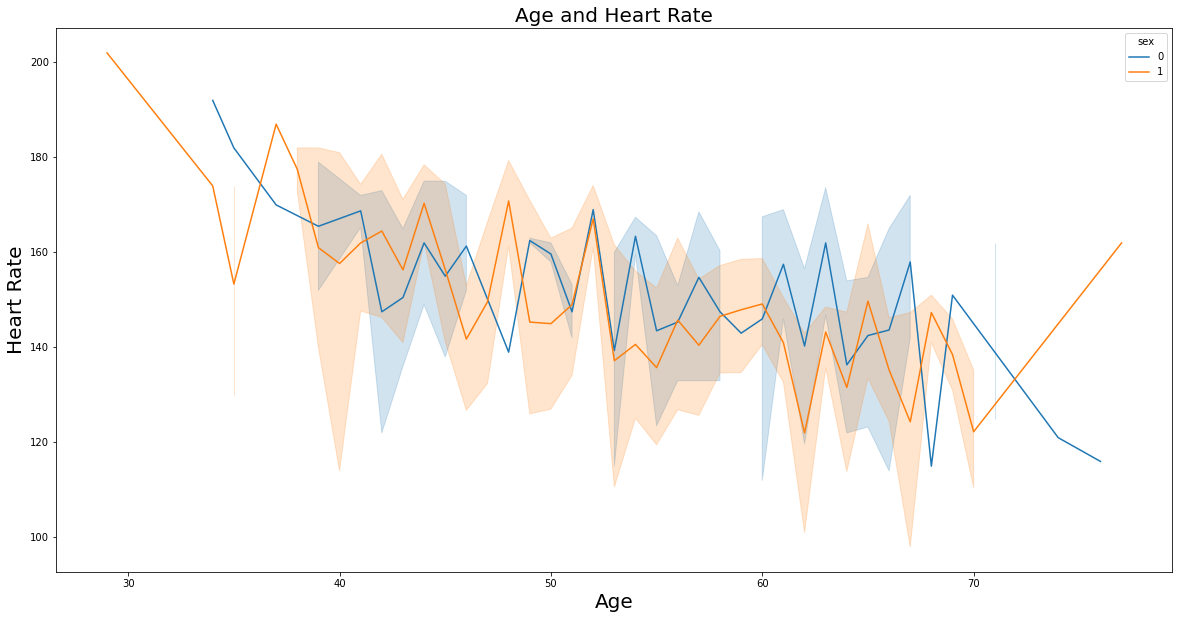

In [97]:
plt.figure(figsize=(20,10))
sns.lineplot(y="thalachh",x="age",data=df, hue="sex")
plt.title("Age and Heart Rate",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Heart Rate",fontsize=20)
plt.show()

We can see with increase in the age of the patients the heart rate is getting lower

**INSIGHT :**

1.  There is no strong relationship with age and heart attack. So we can't say with increasing the age there is high chance of heart attack or low chance of heart attack.

2.  There is high chance of increase in blood pressure in the body when patients get older and Female group look bit higher than Male group

3.  There is high chance of increase in cholestrol level in the body when patients get older and Female group look bit higher than Male group

4.  There is high chance of decrease in heart rate in the body when patients get older and Heart rate in Female group look higher than Male group

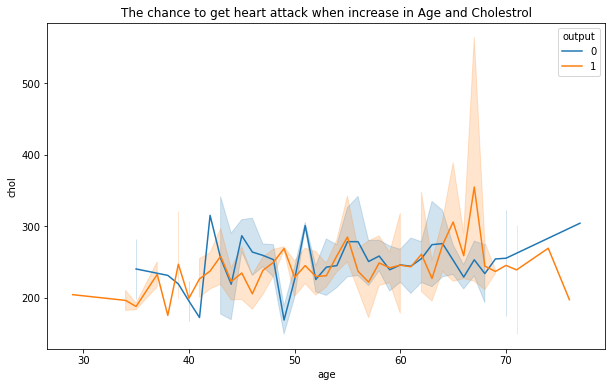

In [101]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="chol",hue="output",data=df)
plt.title("The chance to get heart attack when increase in Age and Cholestrol")
plt.show()

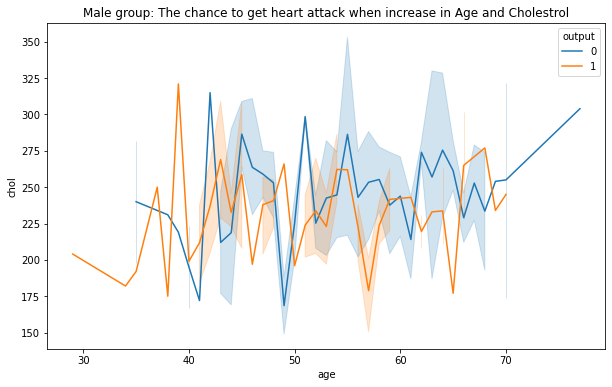

In [102]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="chol",hue="output",data=df[(df["sex"]==1)])
plt.title("Male group: The chance to get heart attack when increase in Age and Cholestrol")
plt.show()

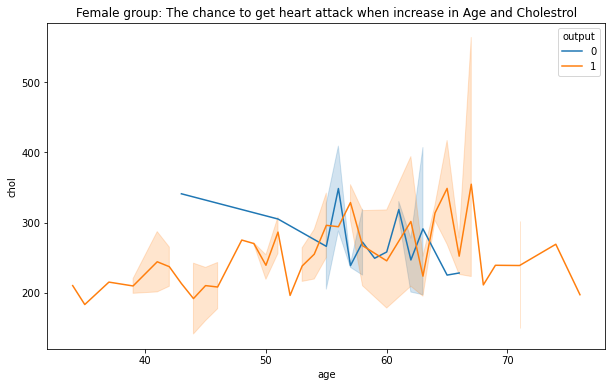

In [103]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="chol",hue="output",data=df[(df["sex"]==0)])
plt.title("Female group: The chance to get heart attack when increase in Age and Cholestrol")
plt.show()

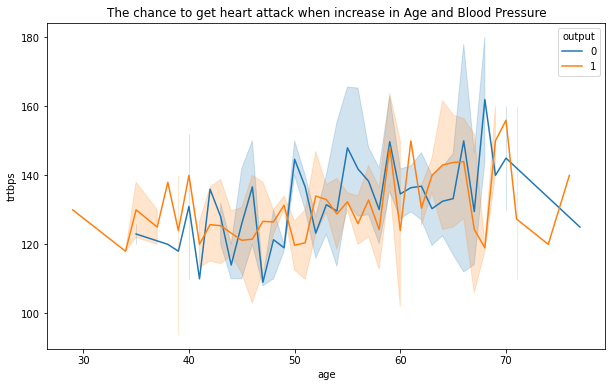

In [104]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="trtbps",hue="output",data=df)
plt.title("The chance to get heart attack when increase in Age and Blood Pressure")
plt.show()

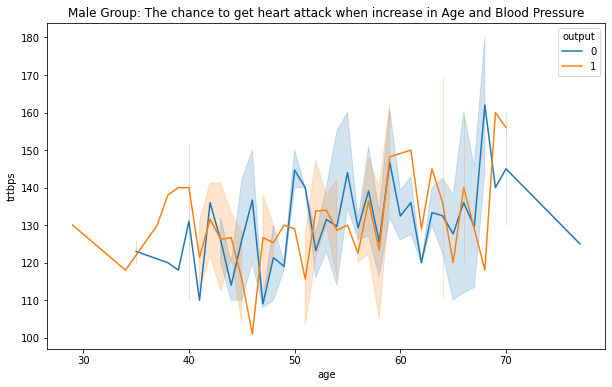

In [106]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="trtbps",hue="output",data=df[(df["sex"]==1)])
plt.title("Male Group: The chance to get heart attack when increase in Age and Blood Pressure")
plt.show()

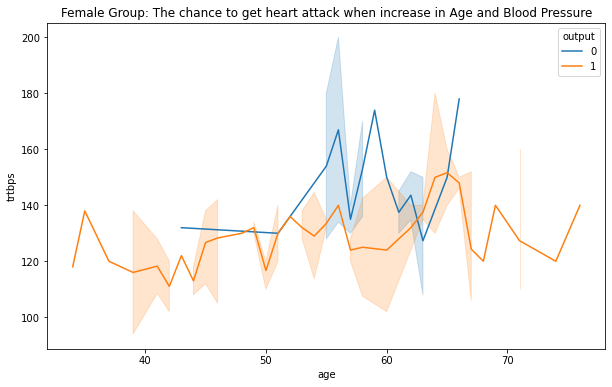

In [105]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="trtbps",hue="output",data=df[(df["sex"]==0)])
plt.title("Female Group: The chance to get heart attack when increase in Age and Blood Pressure")
plt.show()

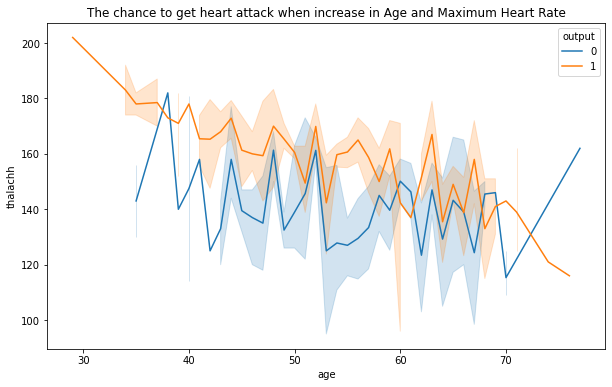

In [107]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="thalachh",hue="output",data=df)
plt.title("The chance to get heart attack when increase in Age and Maximum Heart Rate")
plt.show()

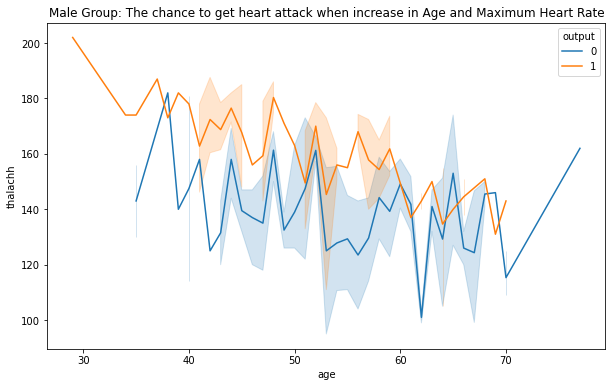

In [108]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="thalachh",hue="output",data=df[(df["sex"]==1)])
plt.title("Male Group: The chance to get heart attack when increase in Age and Maximum Heart Rate")
plt.show()

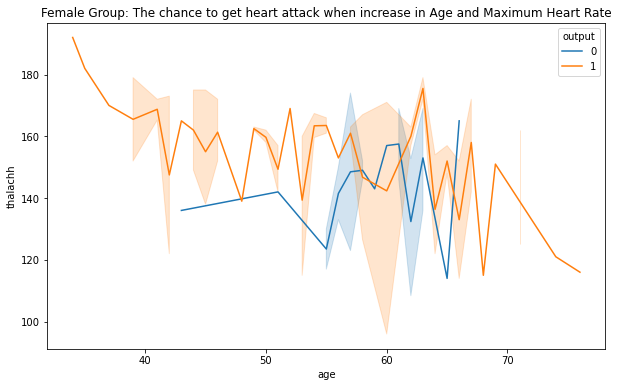

In [109]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="thalachh",hue="output",data=df[(df["sex"]==0)])
plt.title("Female Group: The chance to get heart attack when increase in Age and Maximum Heart Rate")
plt.show()

<AxesSubplot:>

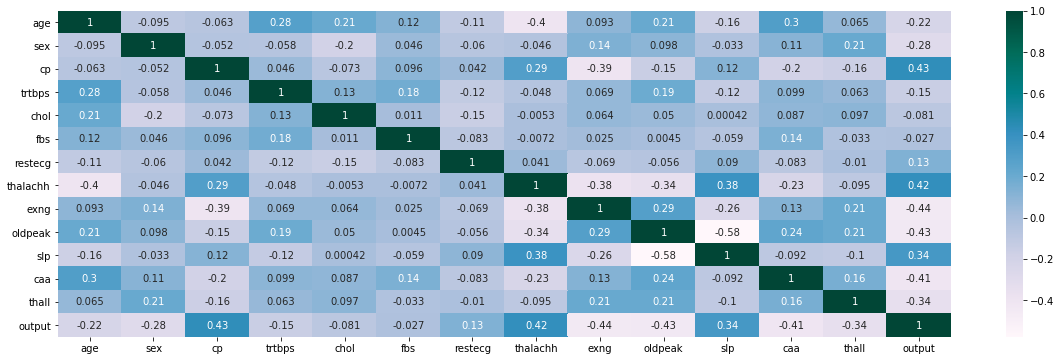

In [25]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

**INSIGHT :**
1.  With increasing in Age, the Cholestrol level is also increasing but with increasing Cholestrol Level in the body it doesn't show the good relation.So we can't say that it really effect the Heart Attack.
2.  Increasing in the Blood Pressure have high risk of Heart Attack.
3.  Person with High Heart Rate Have high risk of Heart Attack.

**Conclusion**
1.  With increasing the age there is no strong relationship of heart attack
2.  Increasing in Heart Rate will have high risk of heart attack 
3.  Increasing in Blood Pressure will have high risk of heart attack
4.  Increasing in Cholestrol Level will have high risk of heart attack

